In [305]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, auc ,precision_score, recall_score, f1_score, roc_curve


import warnings

warnings.filterwarnings('ignore')

In [204]:
#Read File

df = pd.read_csv("credit_risk_dataset.csv")

In [205]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [208]:
# file Null Values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [209]:
# fill null values and change data type object to int

df["person_emp_length"] = pd.to_numeric(df["person_emp_length"], errors='coerce')
df["person_emp_length"] = df["person_emp_length"].fillna(0) 
df["person_emp_length"] = np.round(df["person_emp_length"]).astype(int)


In [210]:
df["loan_int_rate"].fillna(df["loan_int_rate"].mean(), inplace = True)

In [211]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [212]:
df.duplicated().sum()


np.int64(165)

In [213]:
df = df.drop_duplicates()

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  int64  
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 3.2+ MB


In [215]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.659427,9593.845632,11.016733,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.162406,6322.730241,3.083040,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [216]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file = 'output.html')

In [217]:
# prof.to_notebook_iframe()

In [218]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [219]:
nums_cols = df.describe().columns

In [220]:
nums_cols

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [221]:
cat_cols =[ i for i in df.columns if i not in nums_cols]

In [222]:
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [223]:
for i in cat_cols:
    print(df[i].value_counts())
    print("*"*30)

person_home_ownership
RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: count, dtype: int64
******************************
loan_intent
EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: count, dtype: int64
******************************
loan_grade
A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: count, dtype: int64
******************************
cb_person_default_on_file
N    26686
Y     5730
Name: count, dtype: int64
******************************


In [224]:
df.groupby("person_home_ownership")[list(nums_cols)].mean()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_home_ownership,,,,,,,,
MORTGAGE,27.994689,81150.979580,5.732665,10581.829232,10.546095,0.126187,0.151405,5.931558
OTHER,26.839623,76561.273585,3.716981,11028.066038,11.903981,0.311321,0.191132,5.339623
OWN,27.716348,57858.828326,4.824034,9031.096371,10.877860,0.074912,0.188775,5.879828
RENT,27.555501,55019.630663,3.763707,8866.158872,11.416895,0.316095,0.182598,5.705459


In [225]:
df.groupby("loan_intent")[list(nums_cols)].mean()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
loan_intent,,,,,,,,
DEBTCONSOLIDATION,27.613220,66503.466757,4.631336,9605.270765,10.991747,0.286760,0.170906,5.721719
EDUCATION,26.606458,64130.521915,4.355171,9480.049914,10.959958,0.172516,0.170161,5.169708
HOMEIMPROVEMENT,29.070117,73575.109905,5.005843,10362.124374,11.191801,0.261547,0.165506,6.485253
MEDICAL,28.006951,61476.831182,4.630751,9271.578120,11.059221,0.267627,0.173259,5.947865
PERSONAL,28.221171,67820.502728,4.751000,9579.683521,11.004722,0.198981,0.169367,6.132412
VENTURE,27.583949,66429.123724,4.751144,9582.242168,10.959318,0.148539,0.170407,5.734776


In [226]:
df.groupby("loan_grade")[list(nums_cols)].mean()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
loan_grade,,,,,,,,
A,27.683360,66605.836121,4.913389,8545.702140,7.669116,0.099598,0.153757,5.754088
B,27.700780,66332.369789,4.634158,9992.228266,10.997367,0.163185,0.175283,5.790796
C,27.808326,64963.895464,4.359273,9219.175210,13.224929,0.207518,0.170098,5.870923
D,27.875414,63703.096961,4.614917,10855.759669,14.987068,0.590608,0.190981,5.896133
E,27.862928,70856.360332,4.309450,12919.911734,16.491558,0.644860,0.206106,5.828660
F,28.352697,77008.730290,4.165975,14717.323651,17.757991,0.705394,0.215643,6.128631
G,28.437500,76773.296875,6.125000,17195.703125,19.529664,0.984375,0.243906,6.453125


In [227]:
df.groupby("cb_person_default_on_file")[list(nums_cols)].mean()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
cb_person_default_on_file,,,,,,,,
N,27.731769,66195.583939,4.704489,9478.584276,10.335230,0.184329,0.168458,5.803455
Y,27.817976,65607.552531,4.449564,10130.645724,14.190661,0.378709,0.178595,5.847818


In [228]:
nums_cols

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [229]:
nums_cols = "person_age","person_emp_length", "person_income", "loan_amnt", "loan_int_rate","loan_percent_income", "cb_person_cred_hist_length", "loan_status"

In [230]:
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [231]:
nums_cols

('person_age',
 'person_emp_length',
 'person_income',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_status')

In [232]:
for i in cat_cols:
    print(df.groupby(i)["loan_status"].value_counts())
    print("="*40)

person_home_ownership  loan_status
MORTGAGE               0              11682
                       1               1687
OTHER                  0                 73
                       1                 33
OWN                    0               2371
                       1                192
RENT                   0              11201
                       1               5177
Name: count, dtype: int64
loan_intent        loan_status
DEBTCONSOLIDATION  0              3701
                   1              1488
EDUCATION          0              5305
                   1              1106
HOMEIMPROVEMENT    0              2654
                   1               940
MEDICAL            0              4425
                   1              1617
PERSONAL           0              4404
                   1              1094
VENTURE            0              4838
                   1               844
Name: count, dtype: int64
loan_grade  loan_status
A           0              9637
      

In [233]:
for i in nums_cols:
    print(df.groupby(i)["loan_status"].value_counts())
    print("="*40)

person_age  loan_status
20          0                13
            1                 2
21          0               843
            1               370
22          0              2725
                           ... 
80          0                 1
84          0                 1
94          0                 1
123         0                 2
144         0                 3
Name: count, Length: 105, dtype: int64
person_emp_length  loan_status
0                  0              3549
                   1              1424
1                  0              2094
                   1               803
2                  0              2845
                                  ... 
34                 1                 1
38                 0                 1
41                 0                 1
123                0                 1
                   1                 1
Name: count, Length: 65, dtype: int64
person_income  loan_status
4000           1              1
4080           1            

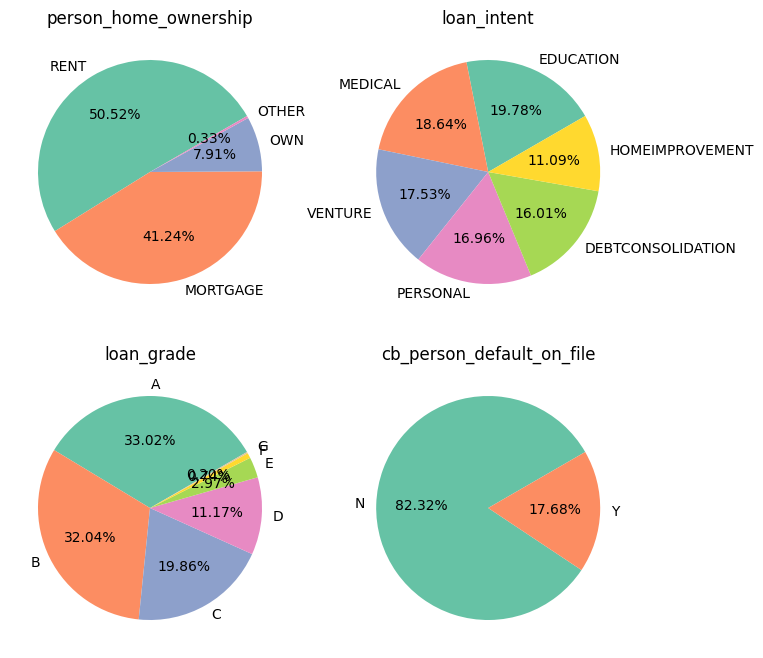

In [235]:
plt.figure(figsize=(8,8))
for i in range(len(cat_cols)):
    plt.subplot(2,2,i+1)
    colors = sns.color_palette("Set2", len(cat_cols[i])) 
    plt.pie(df[cat_cols[i]].value_counts().values, labels = df[cat_cols[i]].value_counts().index, autopct = "%.2f%%", startangle=30, colors = colors)
    plt.title(cat_cols[i])


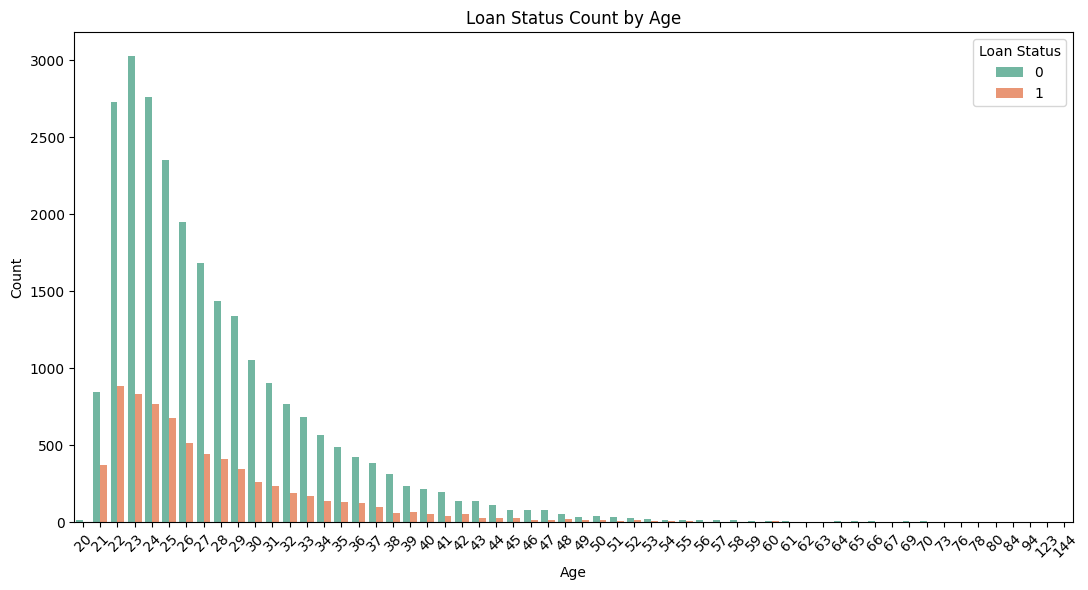

In [236]:
plt.figure(figsize=(11, 6))
sns.countplot(x='person_age', hue='loan_status', data=df, palette='Set2')
plt.title('Loan Status Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

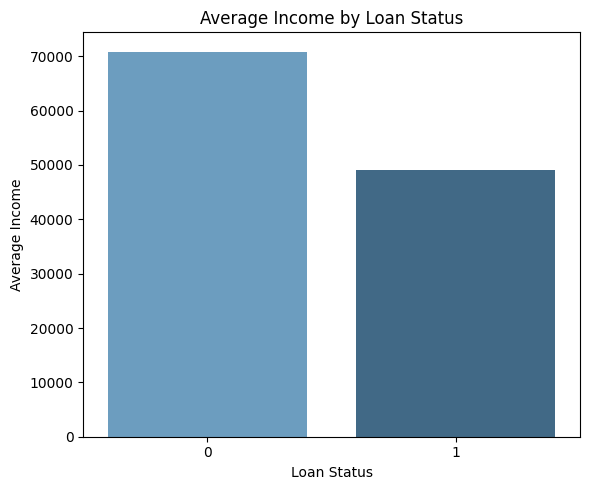

In [237]:
avg_income = df.groupby('loan_status')['person_income'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x='loan_status', y='person_income', data=avg_income, palette='Blues_d')

plt.title('Average Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Income')
plt.tight_layout()
plt.show()


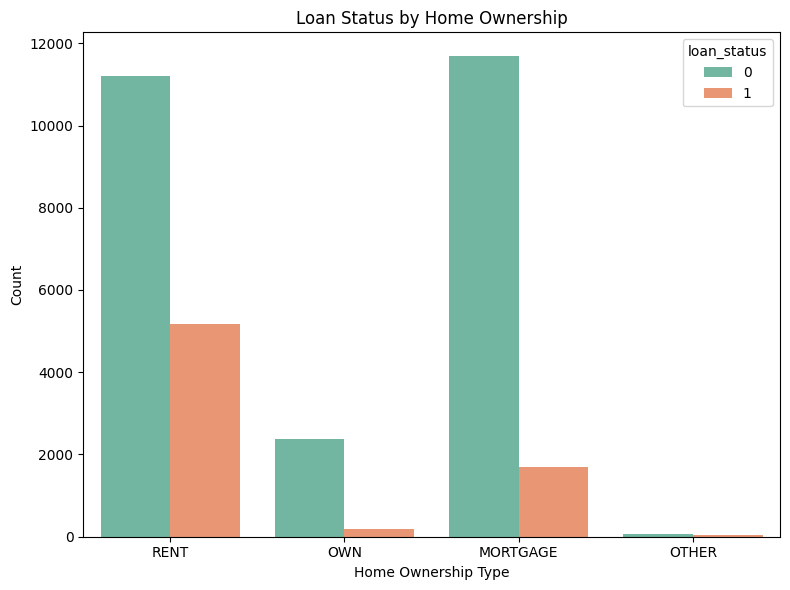

In [238]:
plt.figure(figsize=(8, 6))
sns.countplot(x='person_home_ownership', hue='loan_status', data=df, palette='Set2')
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

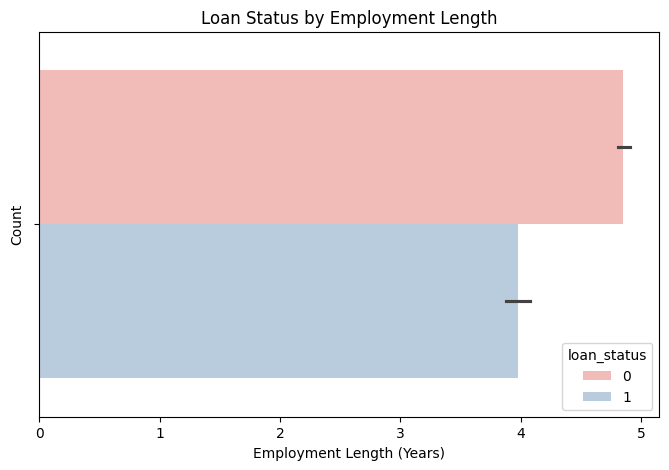

In [239]:
plt.figure(figsize=(8, 5))
sns.barplot(x='person_emp_length', hue='loan_status', data=df, palette = "Pastel1")
plt.title('Loan Status by Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Count')
plt.show()

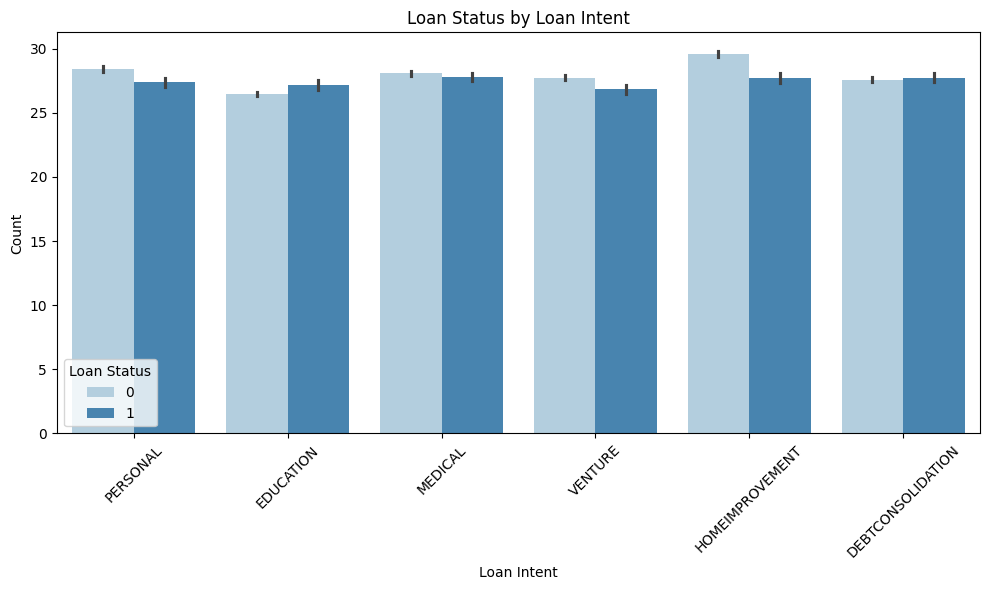

In [240]:
plt.figure(figsize=(10, 6))
sns.barplot(x="loan_intent", y = "person_age", hue='loan_status', data=df, palette = "Blues")

plt.title('Loan Status by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

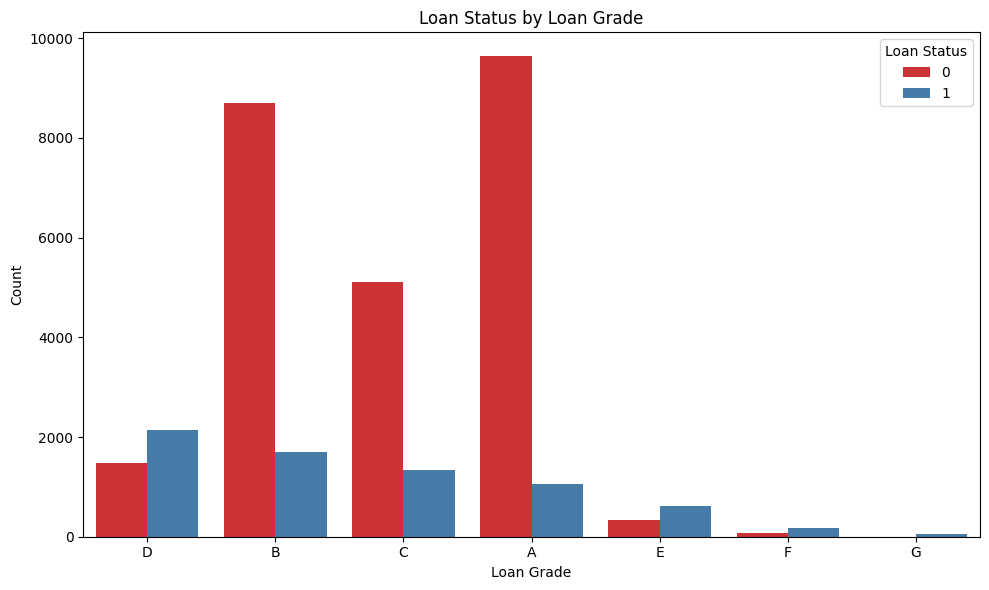

In [241]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_grade', hue='loan_status', data=df, palette="Set1")

plt.title('Loan Status by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

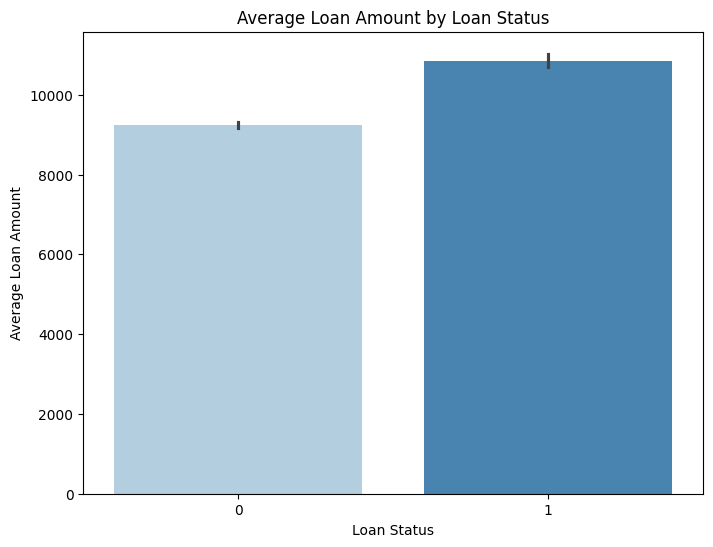

In [242]:
plt.figure(figsize=(8, 6))
sns.barplot(x='loan_status', y='loan_amnt', data=df, palette='Blues', estimator='mean')
plt.title('Average Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Loan Amount')
plt.show()

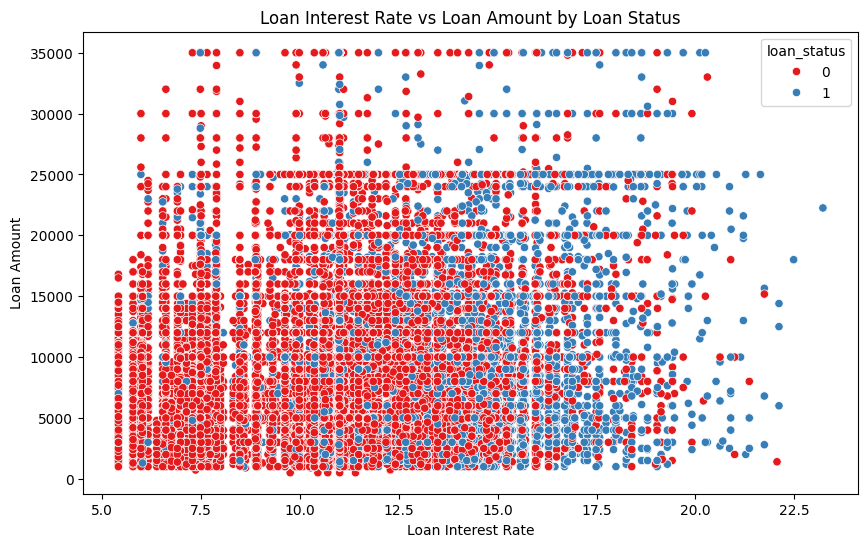

In [243]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_int_rate', y='loan_amnt', hue='loan_status', data=df, palette='Set1')

plt.title('Loan Interest Rate vs Loan Amount by Loan Status')
plt.xlabel('Loan Interest Rate')
plt.ylabel('Loan Amount')
plt.show()

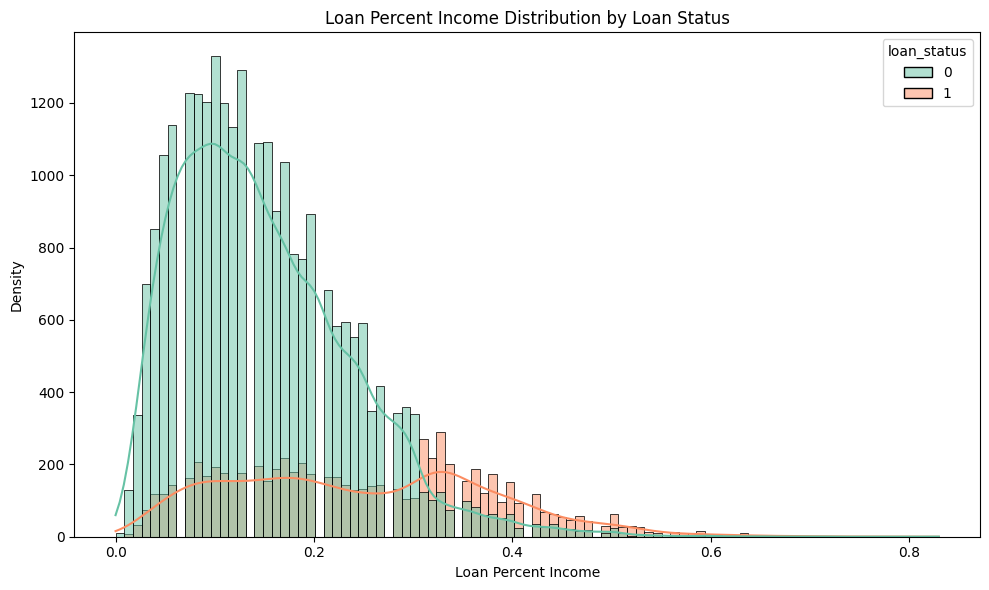

In [244]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loan_percent_income', hue='loan_status', kde=True, palette='Set2')

plt.title('Loan Percent Income Distribution by Loan Status')
plt.xlabel('Loan Percent Income')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

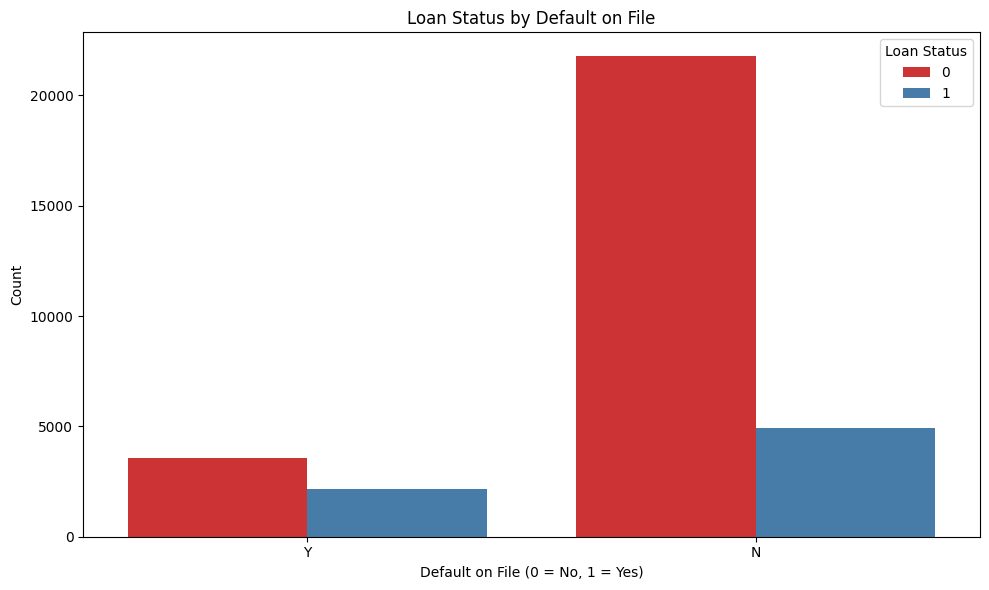

In [245]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cb_person_default_on_file', hue='loan_status', data=df, palette='Set1')

plt.title('Loan Status by Default on File')
plt.xlabel('Default on File (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

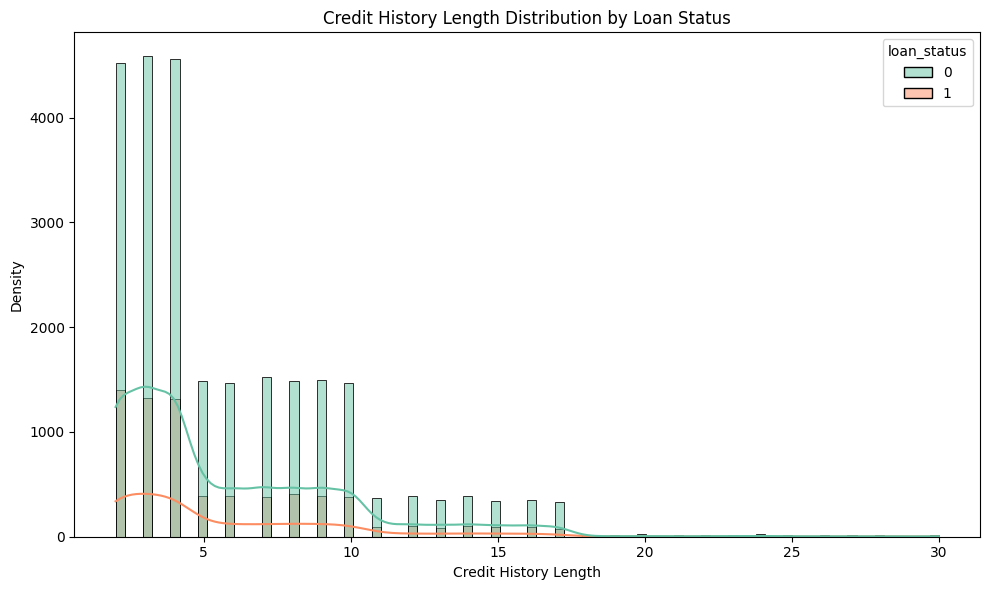

In [246]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cb_person_cred_hist_length', hue='loan_status', kde=True, palette='Set2')

plt.title('Credit History Length Distribution by Loan Status')
plt.xlabel('Credit History Length')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

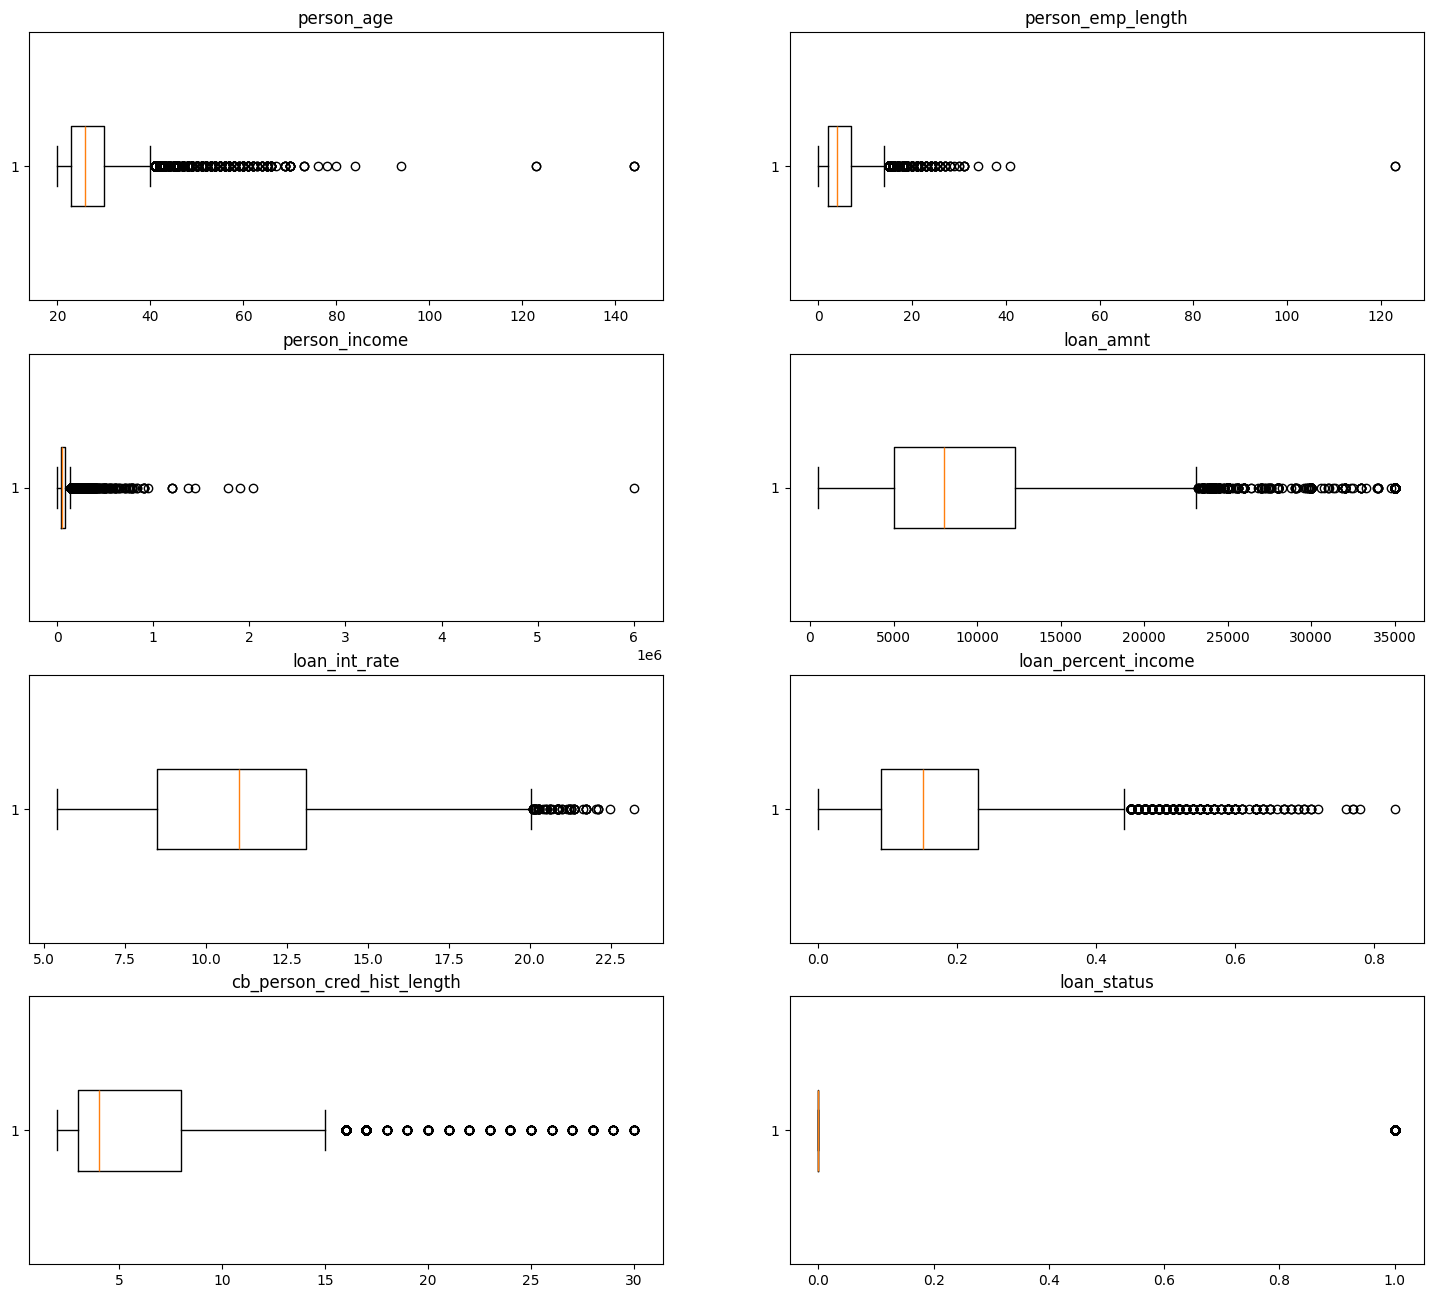

In [149]:
# find outliers

plt.figure(figsize=(18,16))

for i in range (len(nums_cols)):
    plt.subplot(4,2,i+1)
    plt.boxplot(df[nums_cols[i]], vert = False, widths= 0.3)
    plt.title(nums_cols[i])
plt.show()

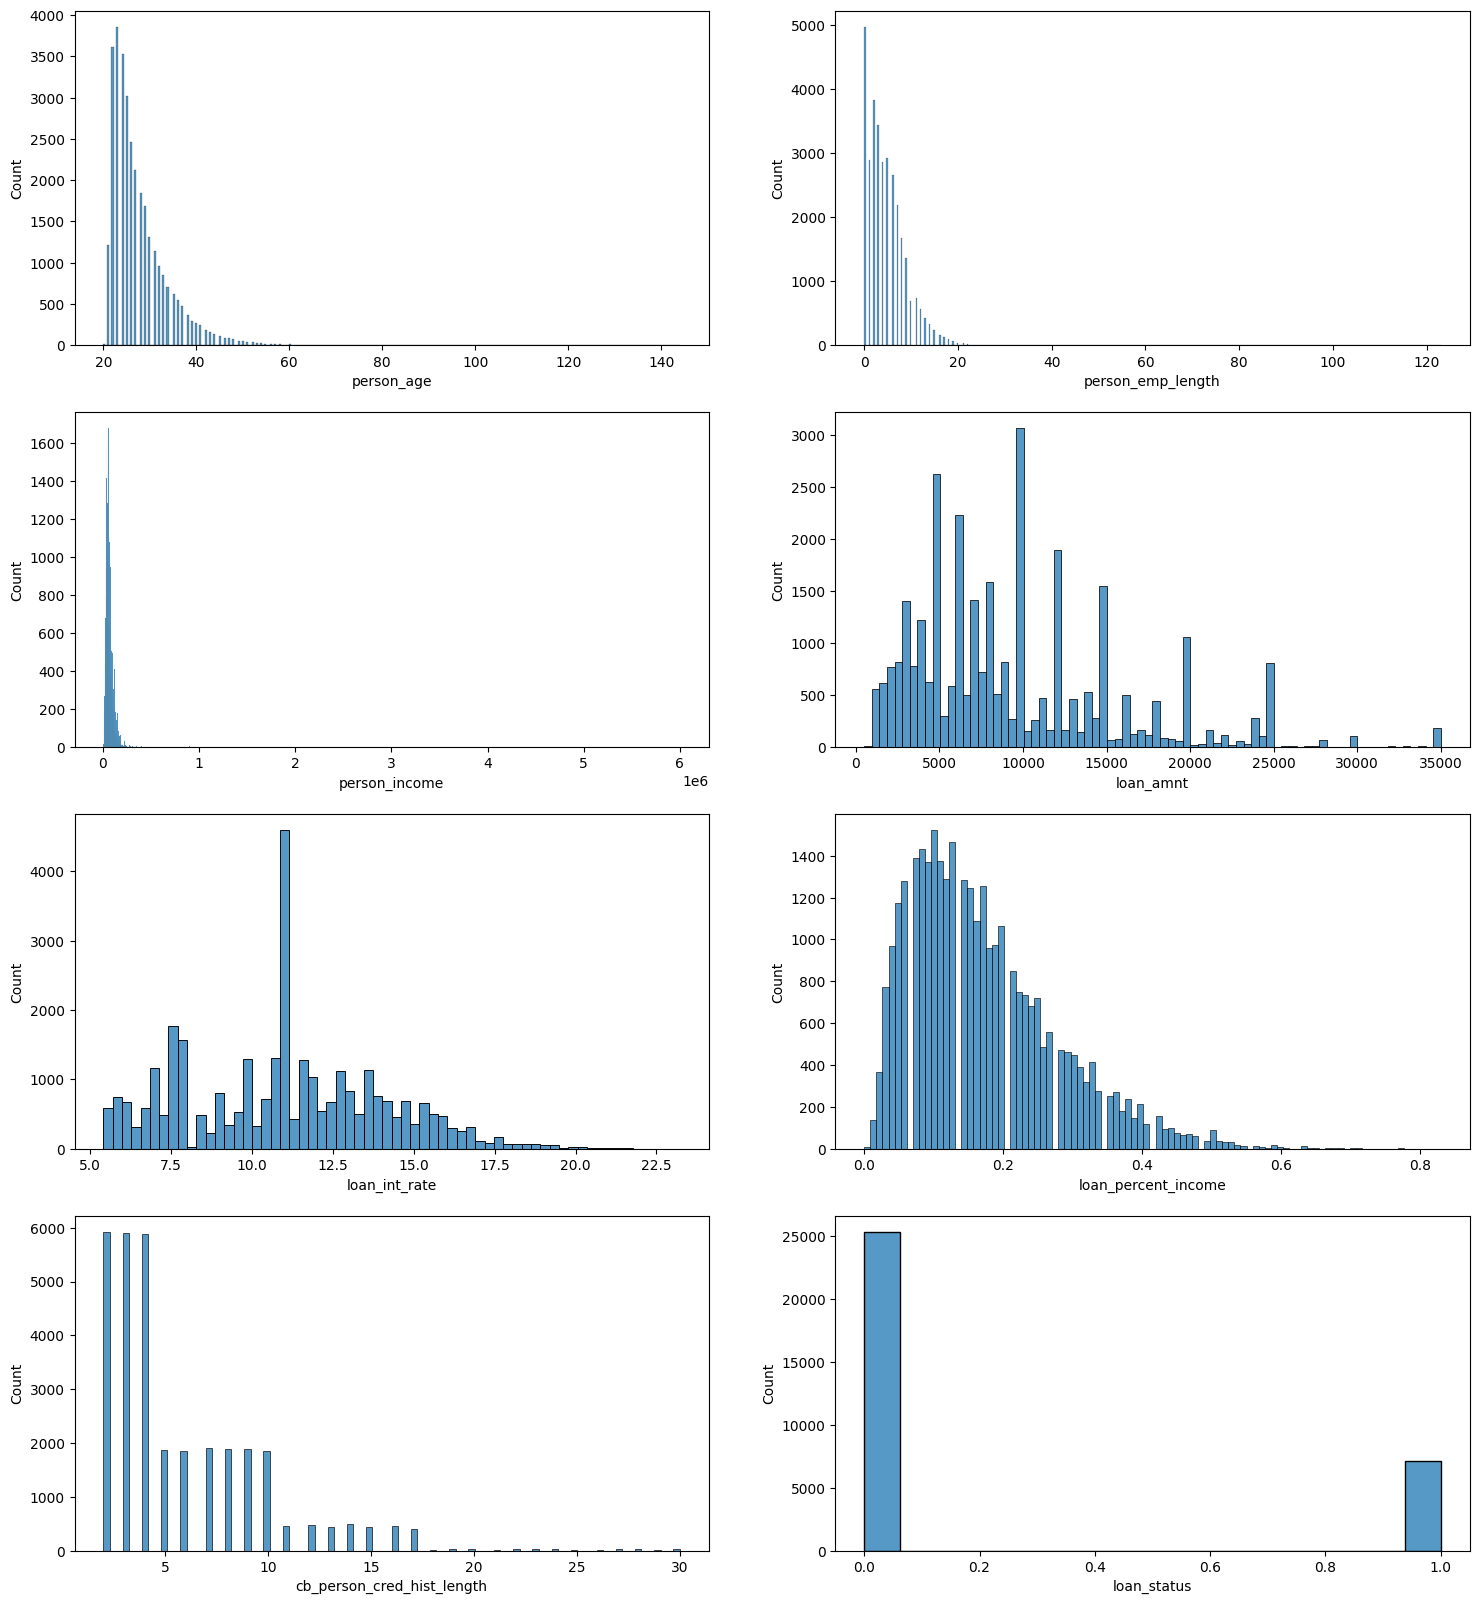

In [251]:
# before power Transformation
# for handle outliers use Power Transformation
plt.figure(figsize = (18, 20))
for i in range(len(nums_cols)):
    plt.subplot(4,2, i+1)
    sns.histplot(df, x= nums_cols[i])

In [252]:
from sklearn.preprocessing import PowerTransformer

# Create a clean subset to transform
cols_to_transform = ["person_age", "person_emp_length", "person_income", "loan_amnt",
                     "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]

# Optional: filter only numeric & non-constant
cols_final = [col for col in cols_to_transform if df[col].nunique() > 1]

# Apply PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[cols_final] = pt.fit_transform(df[cols_final])


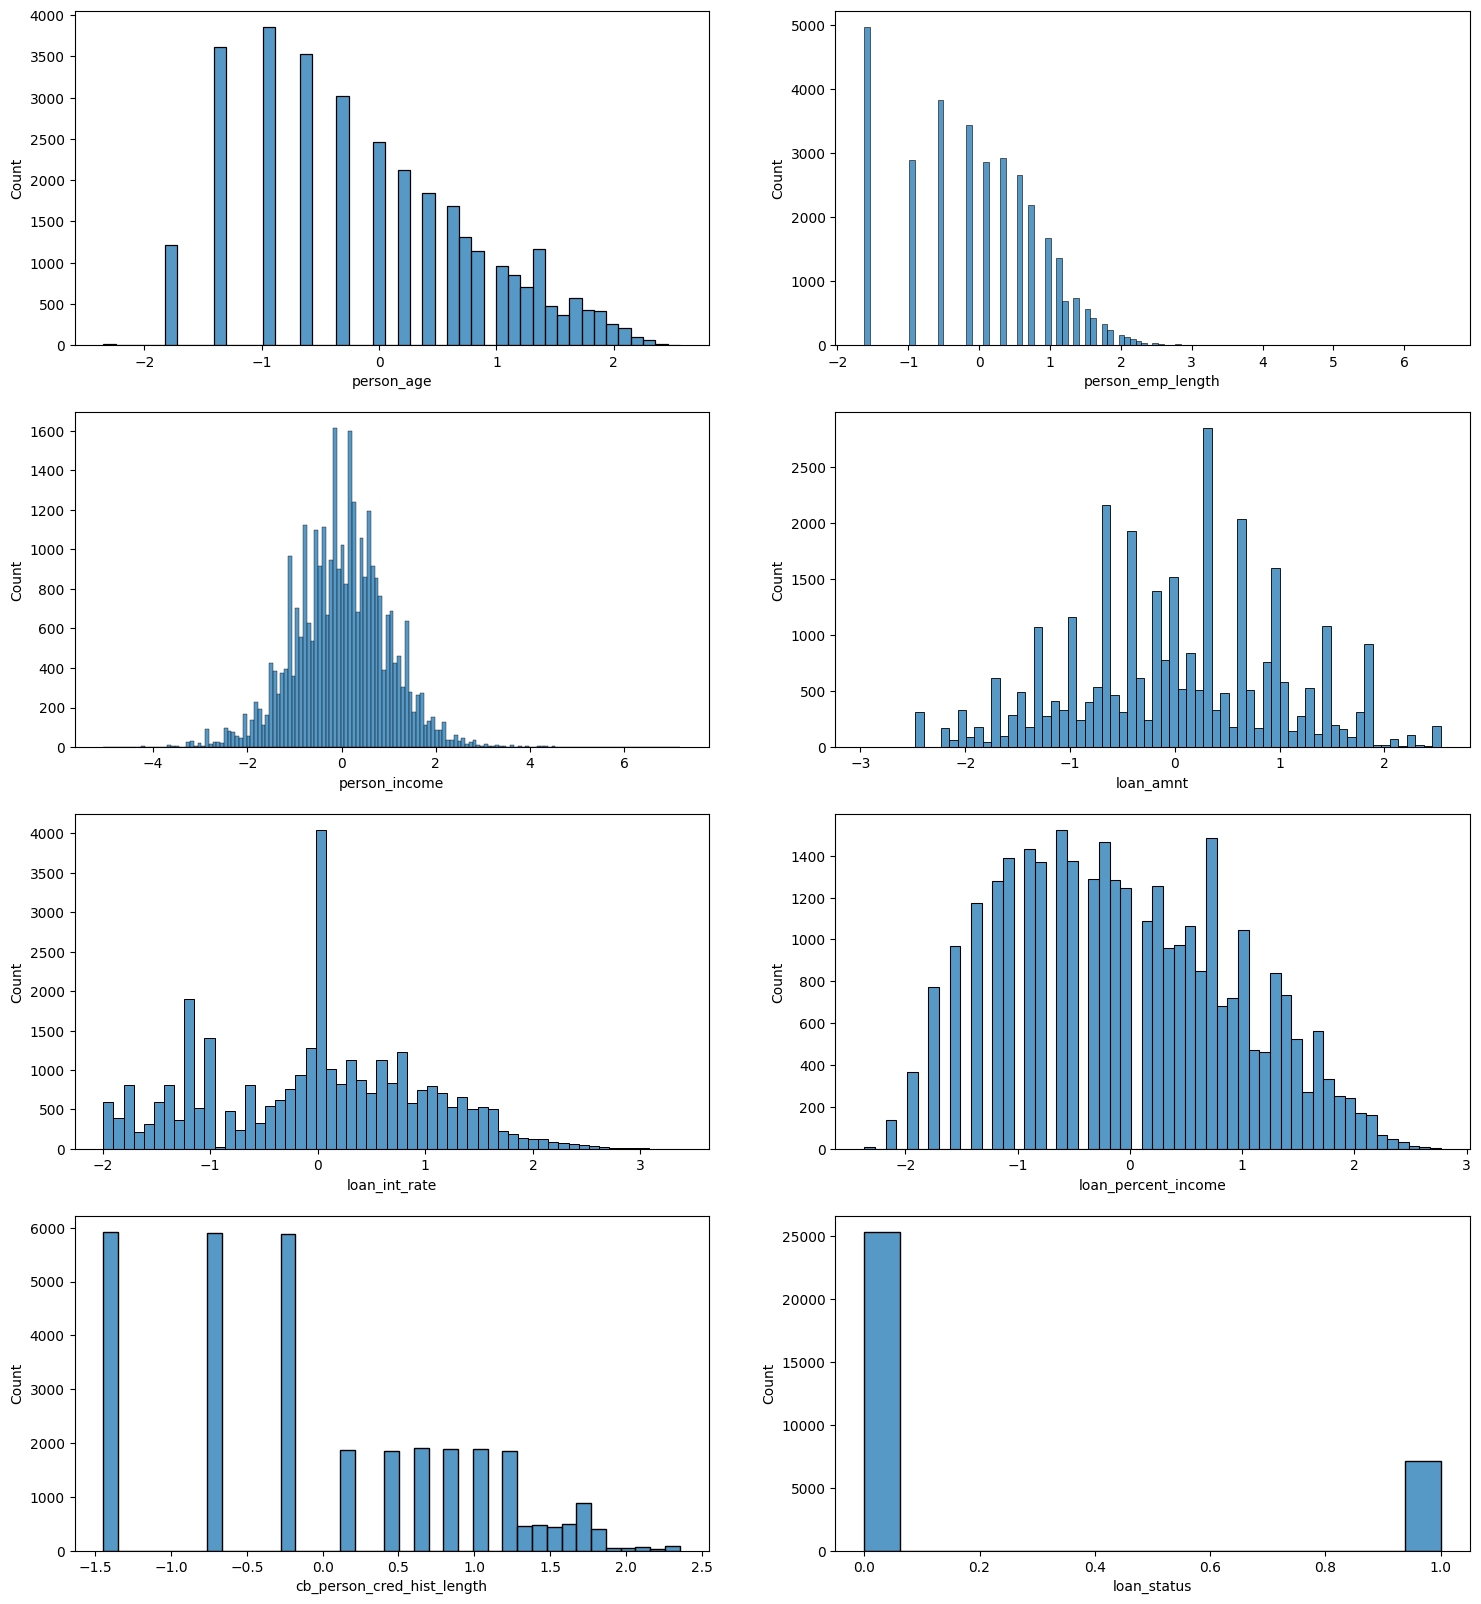

In [253]:
#after Power Transfromation
plt.figure(figsize = (18, 20))
for i in range(len(nums_cols)):
    plt.subplot(4,2, i+1)
    sns.histplot(df, x= nums_cols[i])

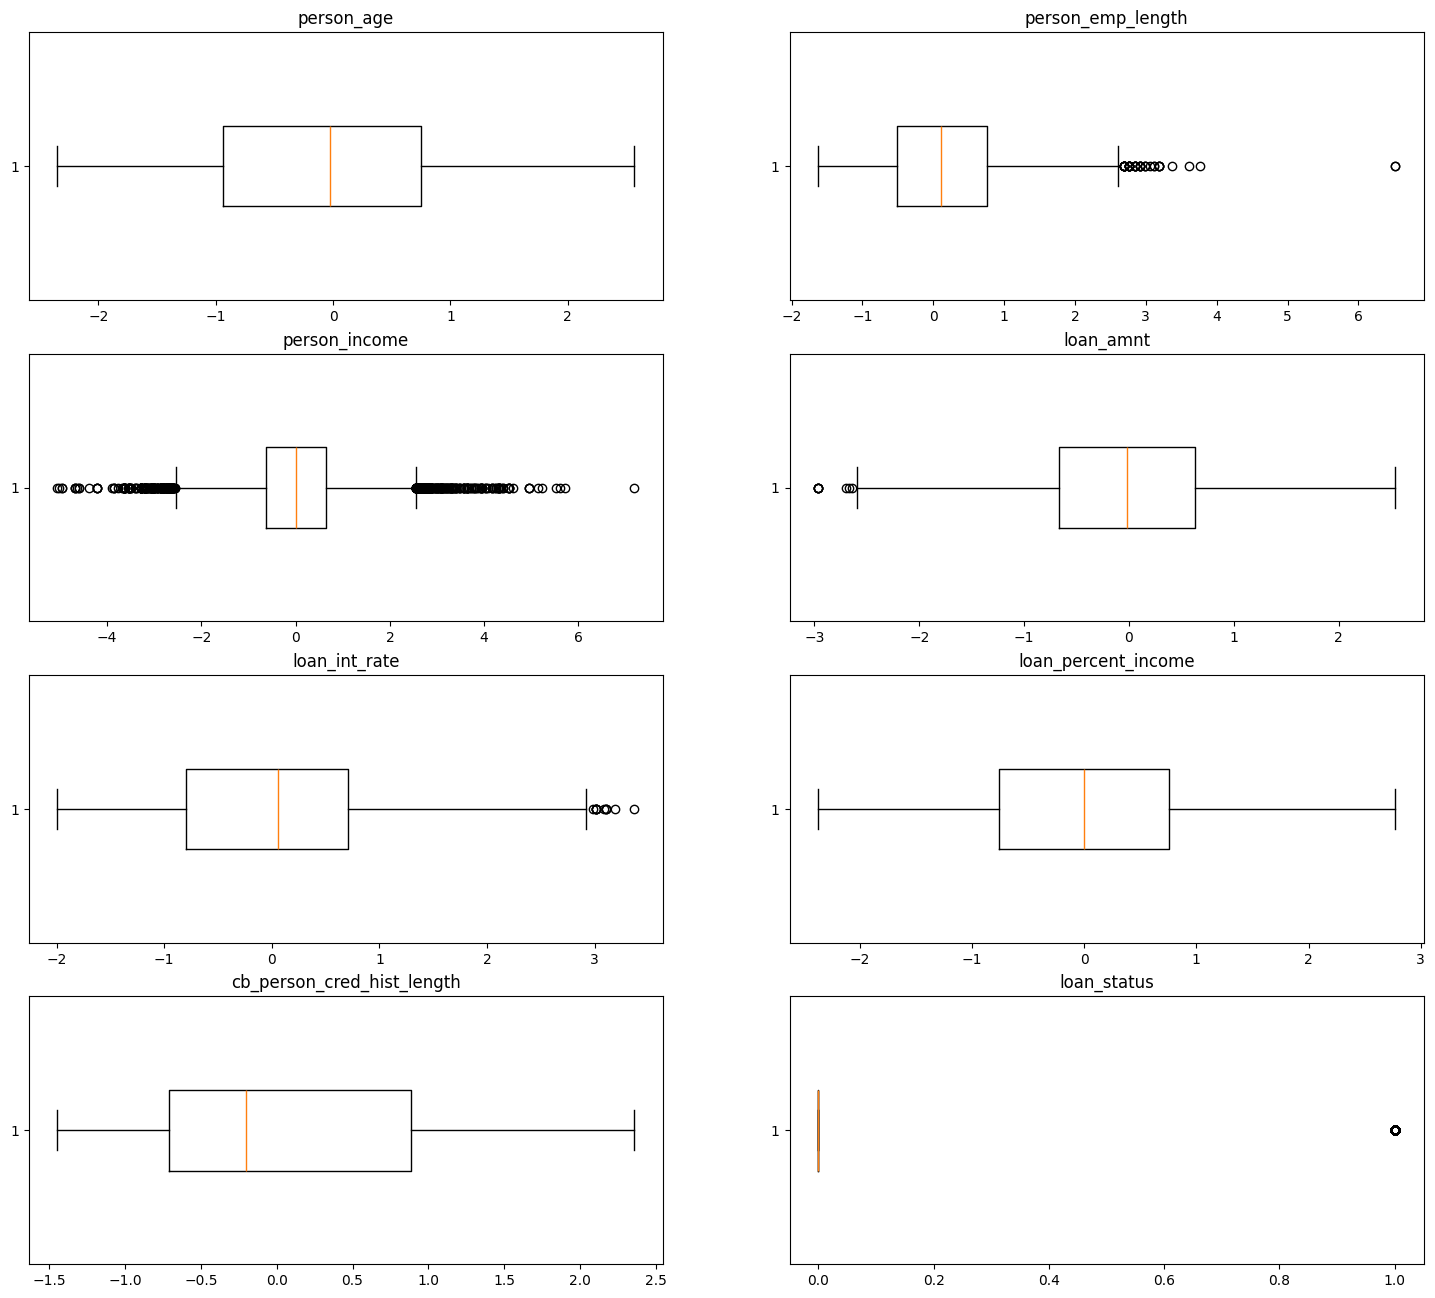

In [255]:
# after use powertransformation

plt.figure(figsize=(18,16))

for i in range (len(nums_cols)):
    plt.subplot(4,2,i+1)
    plt.boxplot(df[nums_cols[i]], vert = False, widths= 0.3)
    plt.title(nums_cols[i])
plt.show()

In [257]:
# encode features

one_hot_En =["person_home_ownership","loan_intent","cb_person_default_on_file"]
label_en = ["loan_status","loan_grade"]
standard_scale = ["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length"]


In [258]:
scaler = StandardScaler()
df[standard_scale ] = scaler.fit_transform(df[standard_scale])
scaler.mean_

array([ 1.35487103e-12, -1.20644966e-15, -9.11851487e-17,  2.45498477e-16,
       -8.94315882e-17,  1.40284844e-16, -1.12227875e-16])

In [259]:
label_encoder = LabelEncoder()
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

In [260]:
loan_grade_order = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
df['loan_grade'] = df['loan_grade'].map(loan_grade_order)

In [261]:
ohe = OneHotEncoder(drop="first")

In [263]:
nominal_en = ohe.fit_transform(df[one_hot_En])

In [264]:
nominal_en

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 52004 stored elements and shape (32416, 9)>

In [265]:
nominal_en.toarray()

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [266]:
ohe.get_feature_names_out()

array(['person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'cb_person_default_on_file_Y'], dtype=object)

In [267]:
new_df = pd.DataFrame(nominal_en.toarray(),columns = ohe.get_feature_names_out())

In [268]:
new_df

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
32411,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32412,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32413,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
32414,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [269]:
df = df.reset_index(drop=True)

In [270]:
df = pd.concat([df,new_df], axis =1)

In [271]:
df.drop(one_hot_En, axis = 1, inplace =True)

In [272]:
df["loan_grade"].fillna("0.0", inplace = True)

In [273]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'cb_person_default_on_file_Y'],
      dtype='object')

In [274]:
df = df[['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'cb_person_default_on_file_Y','loan_status']]

In [277]:
# correlation 
df.corr()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_status
person_age,1.000000,0.156411,0.124334,0.006877,0.066823,0.011773,-0.058709,0.809402,-0.013286,-0.003469,-0.047179,-0.120428,0.114597,0.027070,0.019549,-0.010966,0.006507,-0.034504
person_income,0.156411,1.000000,0.238144,-0.034497,0.425137,-0.023011,-0.383338,0.102801,0.007674,-0.090812,-0.282762,-0.009653,0.071950,-0.059924,0.006323,0.003315,-0.019755,-0.287309
person_emp_length,0.124334,0.238144,1.000000,-0.038500,0.128162,-0.042518,-0.061947,0.091972,-0.014772,-0.001211,-0.216509,-0.024393,0.022057,-0.004577,0.009118,0.005794,-0.024325,-0.101774
loan_grade,0.006877,-0.034497,-0.038500,1.000000,0.091526,0.832537,0.112514,0.006775,0.017016,-0.015872,0.126901,-0.006613,0.027959,-0.001514,-0.002516,-0.011109,0.530365,0.334764
loan_amnt,0.066823,0.425137,0.128162,0.091526,1.000000,0.109440,0.654718,0.044153,0.015180,-0.029739,-0.111196,-0.008491,0.041571,-0.026244,0.001916,0.000545,0.025962,0.086340
loan_int_rate,0.011773,-0.023011,-0.042518,0.832537,0.109440,1.000000,0.119762,0.013067,0.017529,-0.013769,0.135379,-0.008450,0.018552,0.007084,-0.001726,-0.008303,0.468213,0.310378
loan_percent_income,-0.058709,-0.383338,-0.061947,0.112514,0.654718,0.119762,1.000000,-0.037454,0.010800,0.046745,0.120663,0.000807,-0.016724,0.014757,-0.001531,0.000024,0.036785,0.334525
cb_person_cred_hist_length,0.809402,0.102801,0.091972,0.006775,0.044153,0.013067,-0.037454,1.000000,-0.009469,0.007176,-0.035886,-0.084266,0.072119,0.020688,0.021743,-0.006911,0.004439,-0.024370
person_home_ownership_OTHER,-0.013286,0.007674,-0.014772,0.017016,0.015180,0.017529,0.010800,-0.009469,1.000000,-0.016783,-0.057882,-0.005377,0.000426,-0.003826,0.000031,0.009124,0.014538,0.012836
person_home_ownership_OWN,-0.003469,-0.090812,-0.001211,-0.015872,-0.029739,-0.013769,0.046745,0.007176,-0.016783,1.000000,-0.296098,0.005484,0.011957,-0.013127,0.002527,0.097345,-0.003611,-0.101916


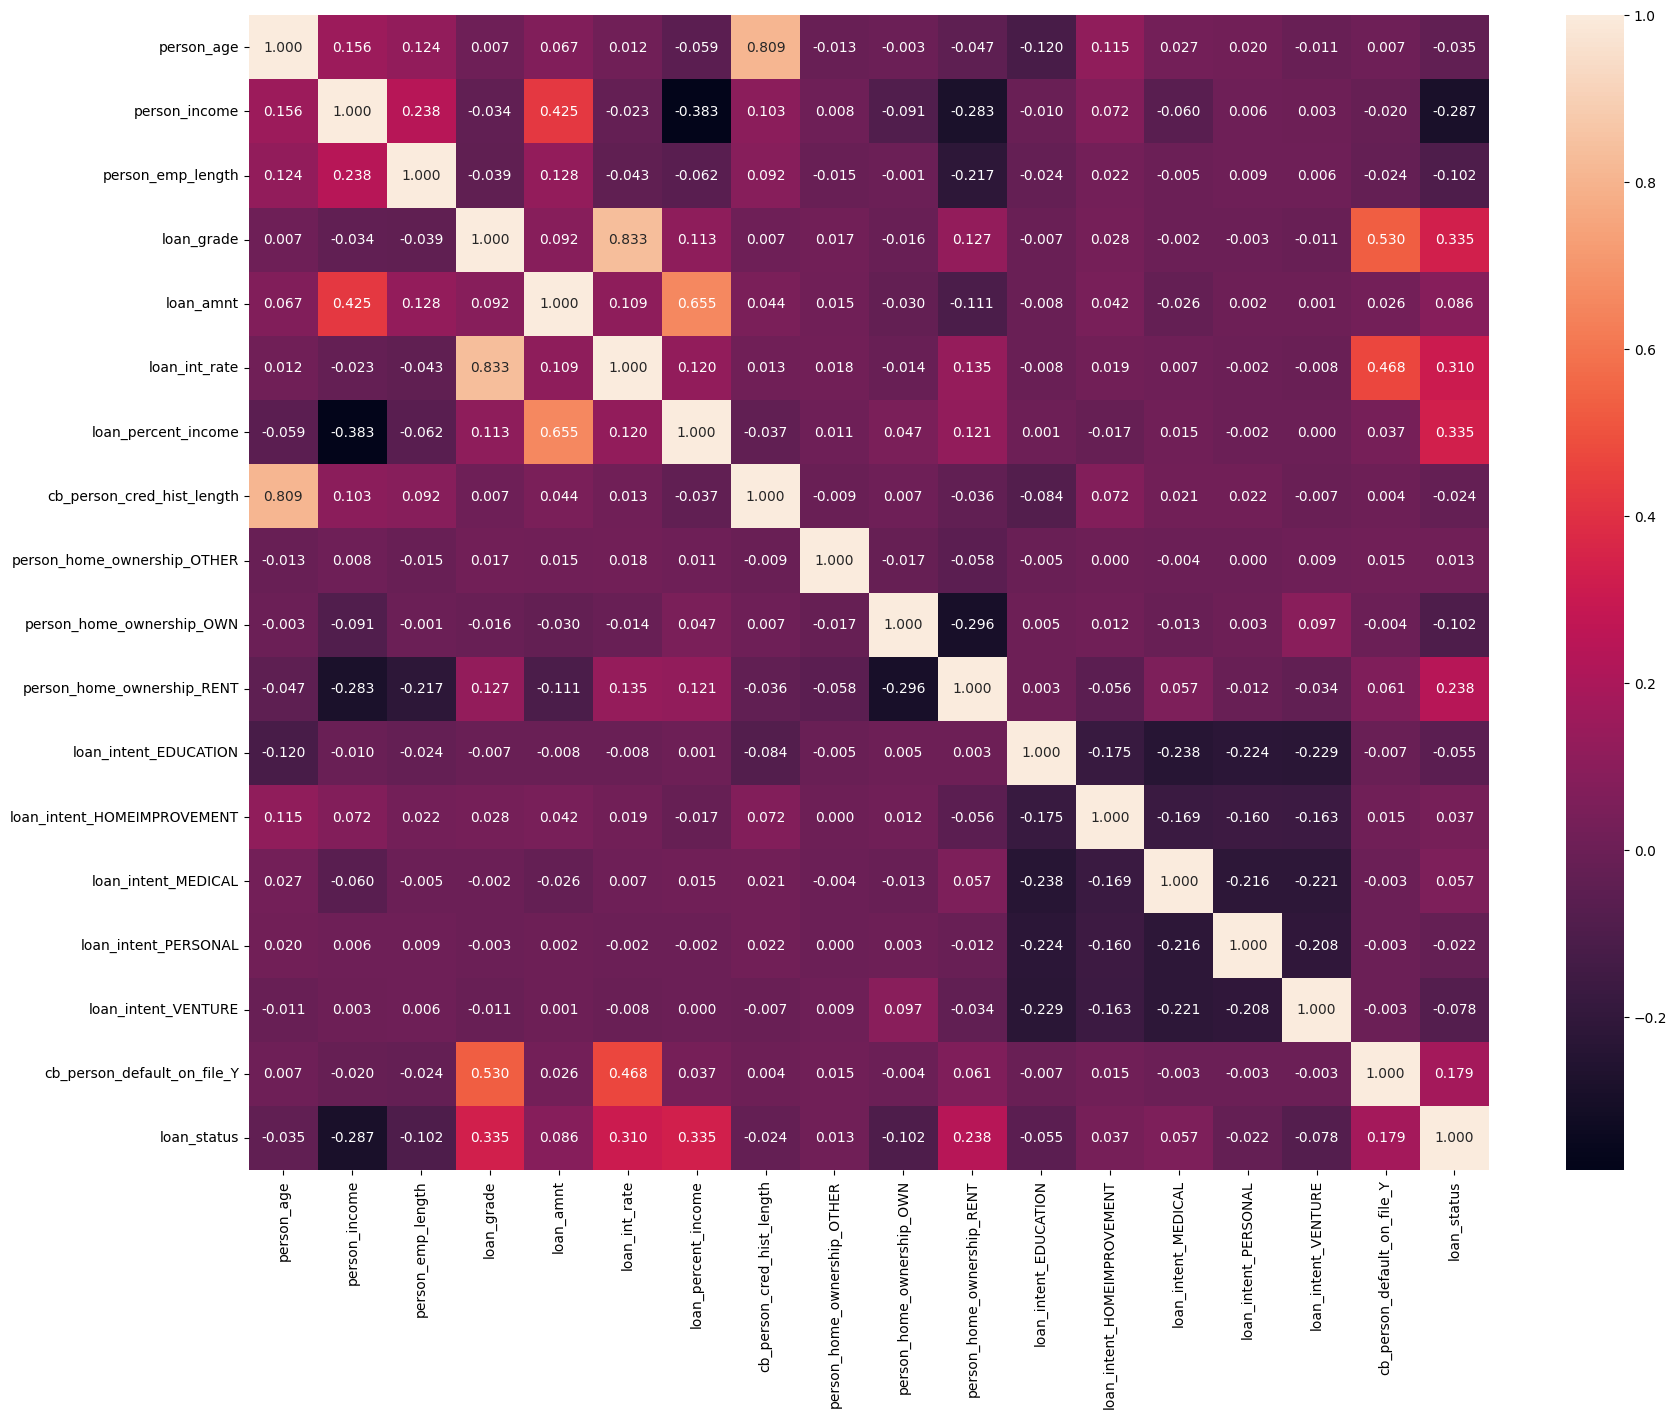

In [278]:
#correlation graph
plt.figure(figsize= (20, 15))
sns.heatmap(df.corr(), annot = True, fmt = ".3f")
plt.show()

In [174]:
np.abs(df.corr()["loan_status"].sort_values(ascending=True))

person_income                  0.287309
person_home_ownership_OWN      0.101916
person_emp_length              0.101774
loan_intent_VENTURE            0.078238
loan_intent_EDUCATION          0.055461
person_age                     0.034504
cb_person_cred_hist_length     0.024370
loan_intent_PERSONAL           0.021546
person_home_ownership_OTHER    0.012836
loan_intent_HOMEIMPROVEMENT    0.036613
loan_intent_MEDICAL            0.056667
loan_amnt                      0.086340
cb_person_default_on_file_Y    0.179385
person_home_ownership_RENT     0.238132
loan_int_rate                  0.310378
loan_percent_income            0.334525
loan_grade                     0.334764
loan_status                    1.000000
Name: loan_status, dtype: float64

In [175]:
# imbalance target columns 
df["loan_status"].value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

In [281]:
# reshampling use for imbalance data 
X = df.drop(columns=["loan_status"])
y = df["loan_status"]


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

print(y_train.value_counts())  

loan_status
0    19000
1    18990
Name: count, dtype: int64


In [284]:
# apply model befor PCA
models = [LogisticRegression(), 
          SVC(), 
          BernoulliNB(), 
          KNeighborsClassifier(n_neighbors=11), 
          DecisionTreeClassifier(max_depth=7), 
          RandomForestClassifier(n_estimators=150, max_depth=5), 
          AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=150)]

In [285]:
for i in models:
    print("Model =", i)
    i.fit(X_train, y_train)
    print("Training Score =", i.score(X_train, y_train))
    pred = i.predict(X_test)
    print("Testing Score =", accuracy_score(y_test, pred))
    print("Precision Score =", precision_score(y_test, pred))
    print("Recall Score =", recall_score(y_test, pred))
    print("F1 Score =", f1_score(y_test, pred))
    print("="*100)

Model = LogisticRegression()
Training Score = 0.7790471176625428
Testing Score = 0.7816645609602021
Precision Score = 0.7730051971874045
Recall Score = 0.7980116774498974
F1 Score = 0.7853094184331082
Model = SVC()
Training Score = 0.8620952882337457
Testing Score = 0.8581806696146557
Precision Score = 0.9112479623256656
Recall Score = 0.7939087896480985
F1 Score = 0.84854106932029
Model = BernoulliNB()
Training Score = 0.7207949460384312
Testing Score = 0.7200726468730259
Precision Score = 0.7089820359281437
Recall Score = 0.7473567934353795
F1 Score = 0.7276638242298533
Model = KNeighborsClassifier(n_neighbors=11)
Training Score = 0.8946301658331139
Testing Score = 0.863945041061276
Precision Score = 0.8299485125858124
Recall Score = 0.9157329966861291
F1 Score = 0.8707329882211718
Model = DecisionTreeClassifier(max_depth=7)
Training Score = 0.8733087654645959
Testing Score = 0.8723152242577384
Precision Score = 0.9600389863547758
Recall Score = 0.7771816316869181
F1 Score = 0.858986

In [303]:
y_proba = model.predict_proba(X_test) #

In [290]:
model_eval = {}

In [291]:
for i in range(len(models)):
    m = models[i]
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    ls = [m.__class__.__name__, m.score(X_train, y_train), tp, tn, fp, fn, accuracy_score(y_test, pred), 
          precision_score(y_test, pred), recall_score(y_test, pred),
         f1_score(y_test, pred)]
    model_eval[i] = ls

In [292]:
model_evaluation_df = pd.DataFrame(model_eval.values(), 
                                  columns=["Model", "Training Score",
                                          "TP", "TN", "FP", "FN", "Accuracy",
                                          "Precision", "Recall", "F1 Score"])

In [293]:
model_evaluation_df

,Model,Training Score,TP,TN,FP,FN,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,0.779047,5057,4842,1485,1280,0.781665,0.773005,0.798012,0.785309
1,SVC,0.862095,5031,5837,490,1306,0.858181,0.911248,0.793909,0.848541
2,BernoulliNB,0.720795,4736,4383,1944,1601,0.720073,0.708982,0.747357,0.727664
3,KNeighborsClassifier,0.894630,5803,5138,1189,534,0.863945,0.829949,0.915733,0.870733
4,DecisionTreeClassifier,0.873309,4925,6122,205,1412,0.872315,0.960039,0.777182,0.858987
5,RandomForestClassifier,0.851961,4912,5845,482,1425,0.849416,0.910641,0.775130,0.837439
6,AdaBoostClassifier,0.906002,5498,5963,364,839,0.905006,0.937905,0.867603,0.901385


In [296]:
# best fit model sis AdaBoost before PCA


model_best = AdaBoostClassifier()

In [297]:
model_best.fit(X_train,y_train)

AdaBoostClassifier()

In [298]:
import pickle 

In [299]:
with open("credit_risk_predic.pkl", "wb") as file :
    pickle.dump(model_best,file)


In [300]:
with open("credit_risk_predic.pkl", "rb") as file:
    pkl_model = pickle.load(file)

In [301]:
pkl_model.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0])

In [302]:
import joblib

joblib.dump(model_best, 'credit_risk_model.pkl')

['credit_risk_model.pkl']